#  Crime Analysis in Victoria

## Initial Data Cleaning

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the dataset for crimes recorded in Victoria
vic_crimes = pd.read_csv("Data/crime_table2.csv", low_memory=False).dropna(how='any')
vic_crimes["Year"] = vic_crimes["Year"].astype(int)
vic_crimes.head()

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2023,December,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,2.0,1.59,1.70
1,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,138.0,109.83,116.99
2,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,146.0,116.20,123.78
3,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",31.0,24.67,26.28
4,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,227.0,180.66,192.45


In [3]:
# Get relevant columns
clean_crimes = vic_crimes[["Year", "Local Government Area", "Offence Division", "Offence Subdivision", 
                     "Incidents Recorded", "LGA Rate per 100,000 population"]]
clean_crimes.head()

,Year,Local Government Area,Offence Division,Offence Subdivision,Incidents Recorded,"LGA Rate per 100,000 population"
0,2023,Ballarat,A Crimes against the person,A10 Homicide and related offences,2.0,1.70
1,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,138.0,116.99
2,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,146.0,123.78
3,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,31.0,26.28
4,2023,Ballarat,A Crimes against the person,A20 Assault and related offences,227.0,192.45


## Crime Rates in All LGAs in 2023

In [4]:
# Filter to only show data by Local Government Area and LGA Rate per 100,000 population for year 2023
crime_23 = clean_crimes.loc[clean_crimes["Year"] == 2023]
crime_all_LGAs = crime_23.groupby("Local Government Area")["LGA Rate per 100,000 population"].sum().reset_index()
crime_all_LGAs_sorted = crime_all_LGAs.sort_values(by="LGA Rate per 100,000 population", ascending=True)  
crime_all_LGAs_sorted.head()

,Local Government Area,"LGA Rate per 100,000 population"
56,Nillumbik,1858.37
23,Golden Plains,2109.88
60,Queenscliffe,2166.78
0,Alpine,2418.08
65,Surf Coast,2449.13


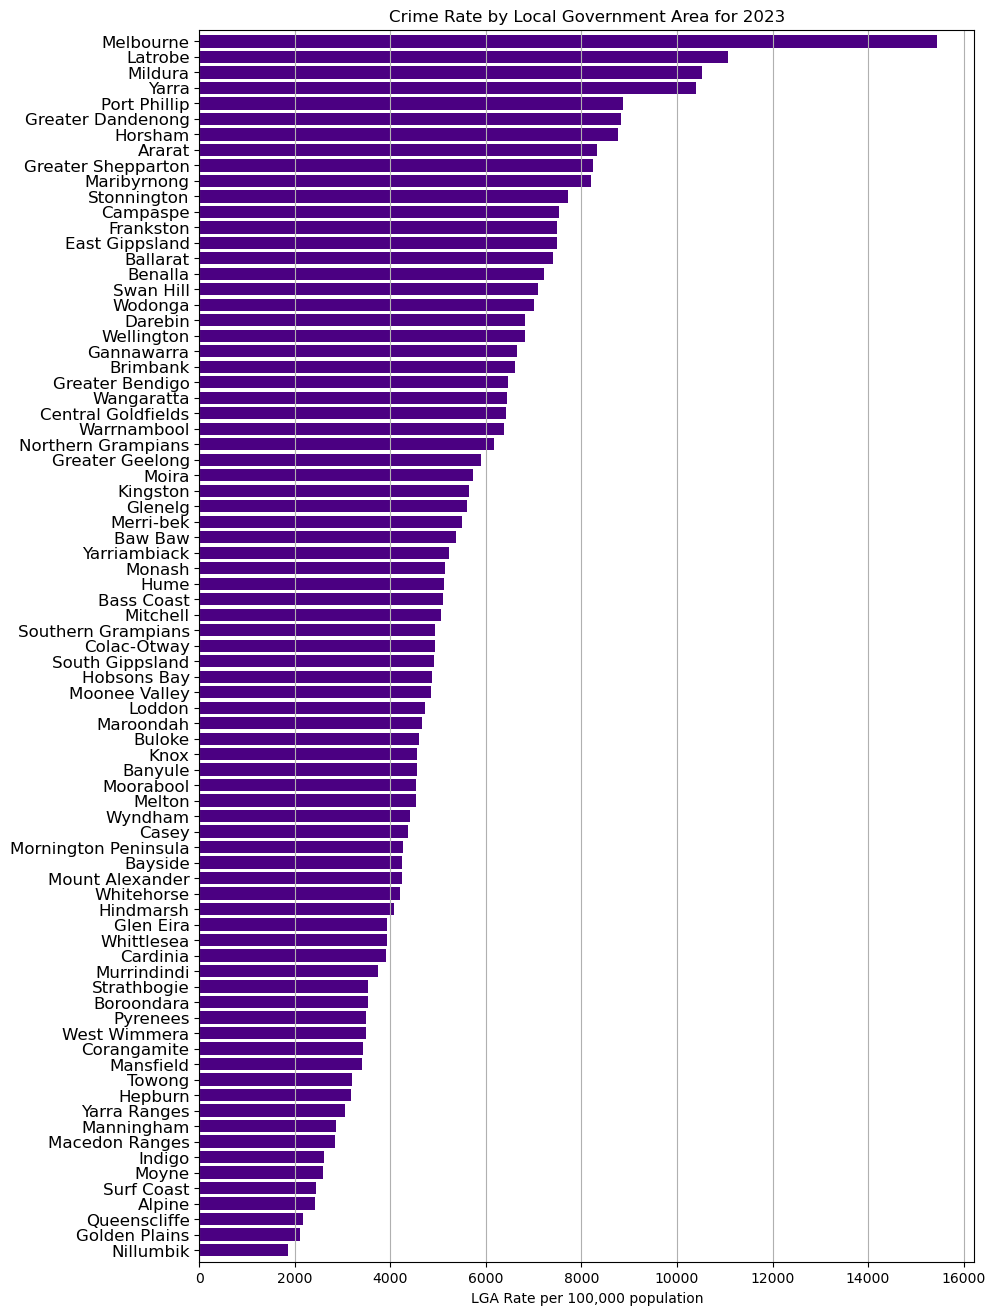

In [5]:
#Plot a horozontal bar chart to show all data clearly.

plt.figure(figsize=(10, 16))

plt.barh(crime_all_LGAs_sorted["Local Government Area"], 
         crime_all_LGAs_sorted["LGA Rate per 100,000 population"],
         color='indigo')

plt.title("Crime Rate by Local Government Area for 2023")
plt.xlabel("LGA Rate per 100,000 population")

plt.yticks(crime_all_LGAs_sorted["Local Government Area"], fontsize=12)

plt.grid(axis='x', linestyle='-')
plt.ylim(-0.75, len(crime_all_LGAs_sorted["Local Government Area"]) - 0.25)

plt.savefig('Visualisation Images/crime rate all LGAs 2023.png', bbox_inches='tight')


## Crime Rates in Top 10 LGAs in 2023

In [6]:
# Filter to only show data by top 10 Local Government Area and LGA Rate per 100,000 population for year 2023
crime_23 = clean_crimes.loc[clean_crimes["Year"] == 2023]
crime_all_LGAs = crime_23.groupby("Local Government Area")["LGA Rate per 100,000 population"].sum().reset_index()
crime_all_LGAs_sorted = crime_all_LGAs.sort_values(by="LGA Rate per 100,000 population", ascending=False)

top_10_LGAs = crime_all_LGAs_sorted.head(10)
top_10_LGAs

,Local Government Area,"LGA Rate per 100,000 population"
43,Melbourne,15451.74
36,Latrobe,11063.65
46,Mildura,10514.90
76,Yarra,10406.93
58,Port Phillip,8869.34
25,Greater Dandenong,8816.78
31,Horsham,8769.09
1,Ararat,8327.36
27,Greater Shepparton,8237.70
41,Maribyrnong,8189.51


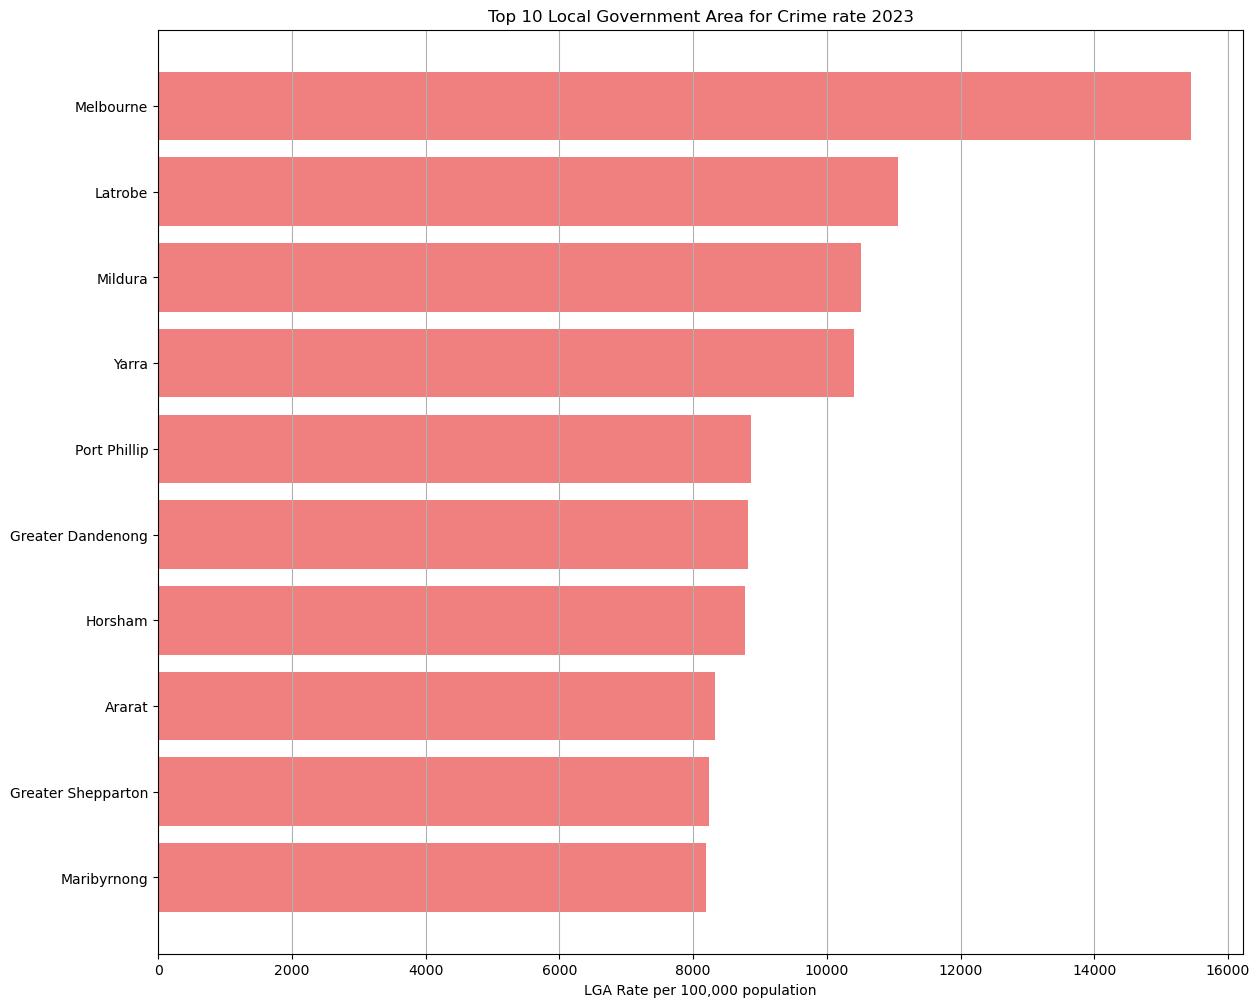

In [7]:
# Plotting the top 10 Local Government Areas based on crime rate
plt.figure(figsize=(14, 12))
plt.barh(top_10_LGAs["Local Government Area"], top_10_LGAs["LGA Rate per 100,000 population"], color='lightcoral')
plt.title("Top 10 Local Government Area for Crime rate 2023")
plt.xlabel("LGA Rate per 100,000 population")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='-')
plt.savefig('Visualisation Images/top 10 LGA crime rate 2023.png', bbox_inches='tight')


## Crime Rates for Top 10 LGAs  over the period 2014-2023 

In [8]:
# Define the list of desired Local Government Areas
desired_LGAs = ['Melbourne', 'Latrobe', 'Mildura', 'Yarra', 'Port Phillip',
                'Greater Dandenong', 'Horsham', "Ararat", 'Greater Shepparton', 'Maribyrnong']

# Filter the DataFrame to include only the desired LGAs and years
filtered_crimes = clean_crimes[(clean_crimes['Year'] >= 2014) & (clean_crimes['Year'] <= 2023) &
                                (clean_crimes['Local Government Area'].isin(desired_LGAs))]

# Group by Year and Local Government Area, and sum the 'LGA Rate per 100,000 population' column
LGA_crime_2014_to_2023 = filtered_crimes.groupby(['Year', 'Local Government Area'])['LGA Rate per 100,000 population'].sum().reset_index()
LGA_crime_2014_to_2023.head()

,Year,Local Government Area,"LGA Rate per 100,000 population"
0,2014,Ararat,6903.05
1,2014,Greater Dandenong,7926.46
2,2014,Greater Shepparton,8804.83
3,2014,Horsham,7990.66
4,2014,Latrobe,10541.75


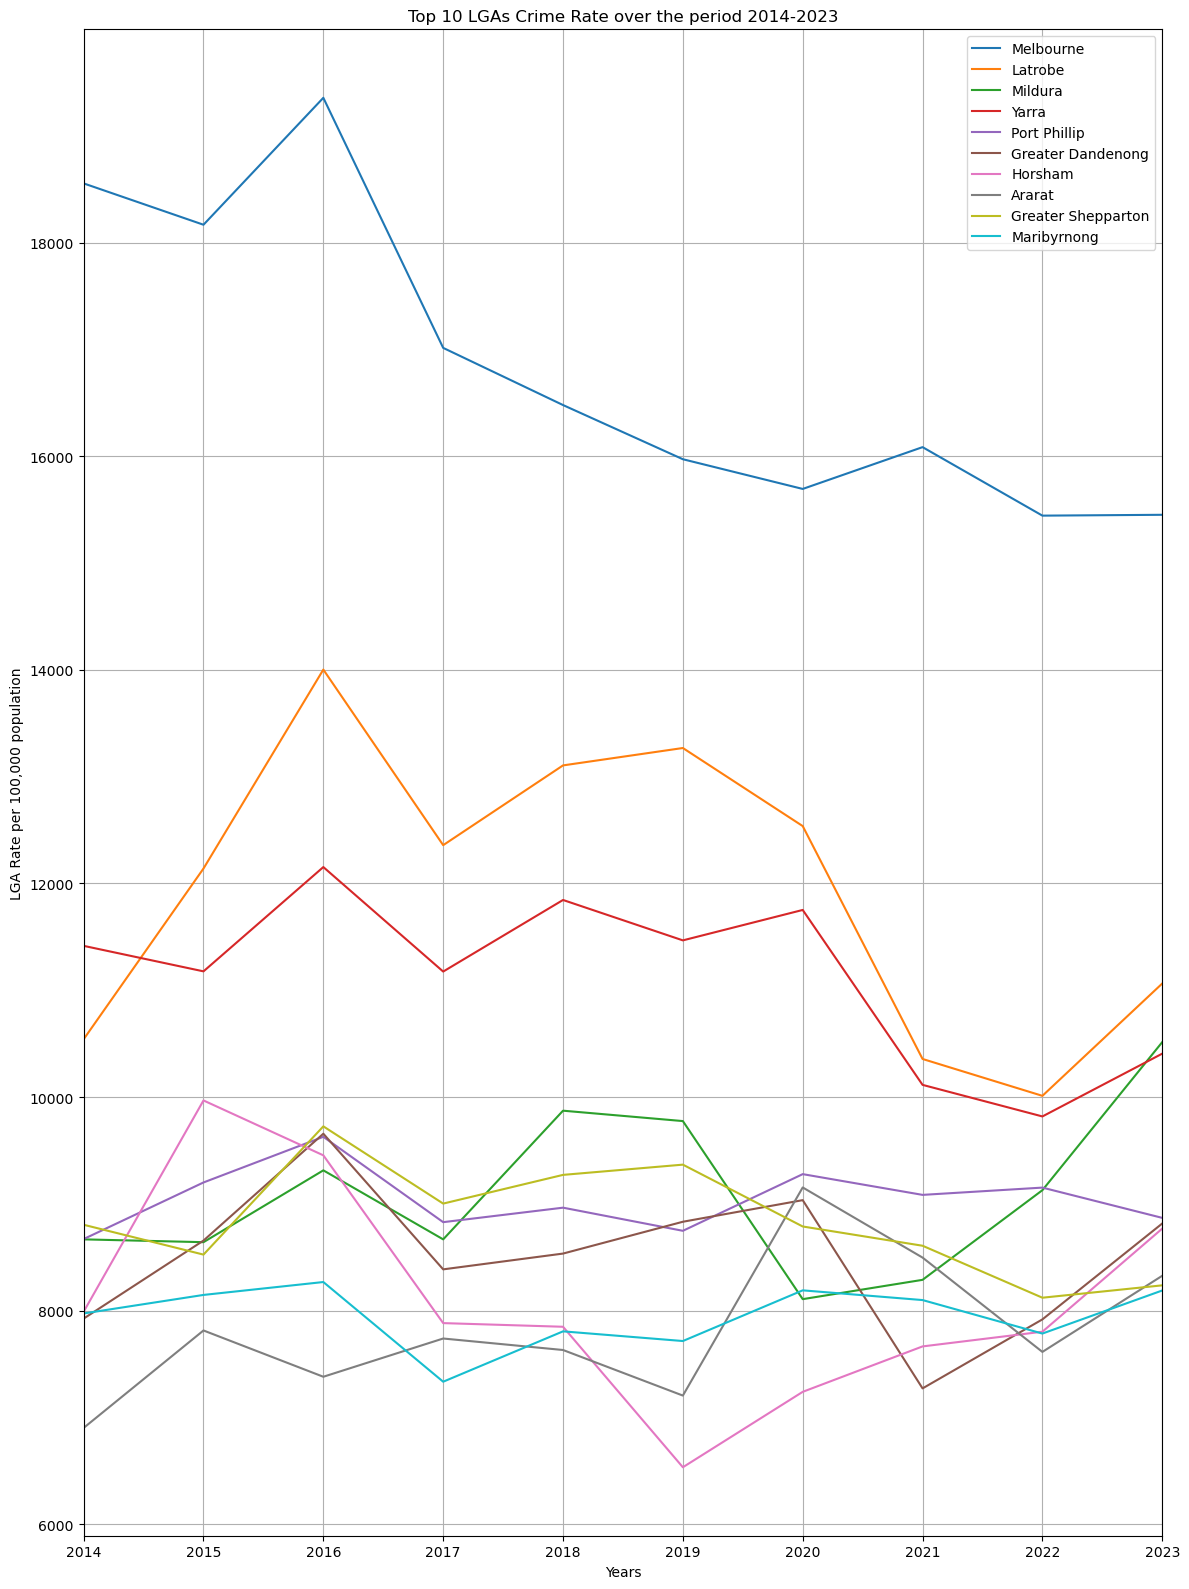

In [9]:

# Plotting the line chart
plt.figure(figsize=(12, 16))  # Adjust the figure size as needed
for LGA in desired_LGAs:
    LGA_data = LGA_crime_2014_to_2023[LGA_crime_2014_to_2023['Local Government Area'] == LGA]
    plt.plot(LGA_data['Year'], LGA_data['LGA Rate per 100,000 population'], label=LGA)

plt.title('Top 10 LGAs Crime Rate over the period 2014-2023')
plt.xlabel('Years')
plt.ylabel('LGA Rate per 100,000 population')
plt.legend()
plt.grid(True)

# Set x-axis limits and ticks to start from the very beginning
plt.xlim(2014, 2023)  # Set the x-axis limits from 2014 to 2023
plt.xticks(range(2014, 2024))  

plt.tight_layout()  

plt.savefig('Visualisation Images/top 10 LGA crime rate over the period 2014-2023.png')



## Divisions of Crime in 2023 

In [10]:
# To create a dataframe for showing crime incidents recorded by offence division. 
# Group by 'Offence Division' and sum the 'Incidents Recorded' column
divisions_group = crime_23.groupby("Offence Division")['Incidents Recorded'].sum()

# Create a DataFrame from the grouped data
division_incidents = pd.DataFrame(divisions_group).reset_index()
division_incidents['Offence Division'] = division_incidents['Offence Division'].apply(lambda x: x[1:])
division_incidents

,Offence Division,Incidents Recorded
0,Crimes against the person,66787.0
1,Property and deception offences,229330.0
2,Drug offences,13740.0
3,Public order and security offences,16395.0
4,Justice procedures offences,57791.0
5,Other offences,631.0


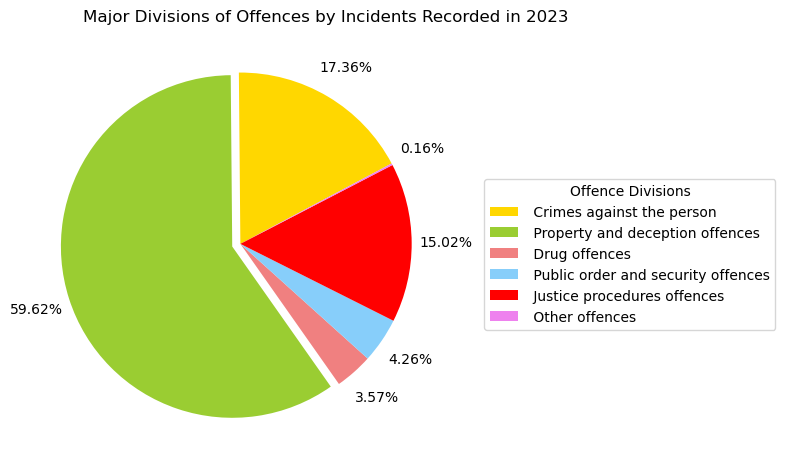

In [11]:
#Plotting the pie chart
division_incidents['Percentage'] = (division_incidents['Incidents Recorded'] / division_incidents['Incidents Recorded'].sum()) * 100
plt.figure(figsize=(8, 8))
colours = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "red", "violet"]
explode = [0, 0.05, 0, 0, 0, 0]
plt.pie(division_incidents['Incidents Recorded'], autopct='%.02f%%', colors=colours, radius=1,
        startangle=28, explode=explode, pctdistance=1.2)
plt.title("Major Divisions of Offences by Incidents Recorded in 2023", x=0.7)

plt.legend(division_incidents['Offence Division'], loc=(1.07, 0.3), title="Offence Divisions")


plt.tight_layout()

plt.savefig('Visualisation Images/major division of offences for 2023.png')


In [12]:
## To create a dataframe for showing crime incidents recorded by offence subdivision. 
crimes_by_subdivision = clean_crimes.loc[clean_crimes["Year"] == 2023]
crimes_by_subdivision = crimes_by_subdivision.groupby(['Offence Subdivision'])["Incidents Recorded"].sum().reset_index()
crimes_by_subdivision_sorted = crimes_by_subdivision.sort_values(by="Incidents Recorded", ascending=False)
crimes_by_subdivision_sorted['Offence Subdivision'] = crimes_by_subdivision_sorted['Offence Subdivision'].apply(lambda x: x[3:])
crimes_by_subdivision_sorted_on = crimes_by_subdivision_sorted.head(10)

crimes_by_subdivision_sorted.head()

,Offence Subdivision,Incidents Recorded
11,Theft,136836.0
23,Breaches of orders,49932.0
1,Assault and related offences,42056.0
10,Burglary/Break and enter,35824.0
9,Property damage,34572.0


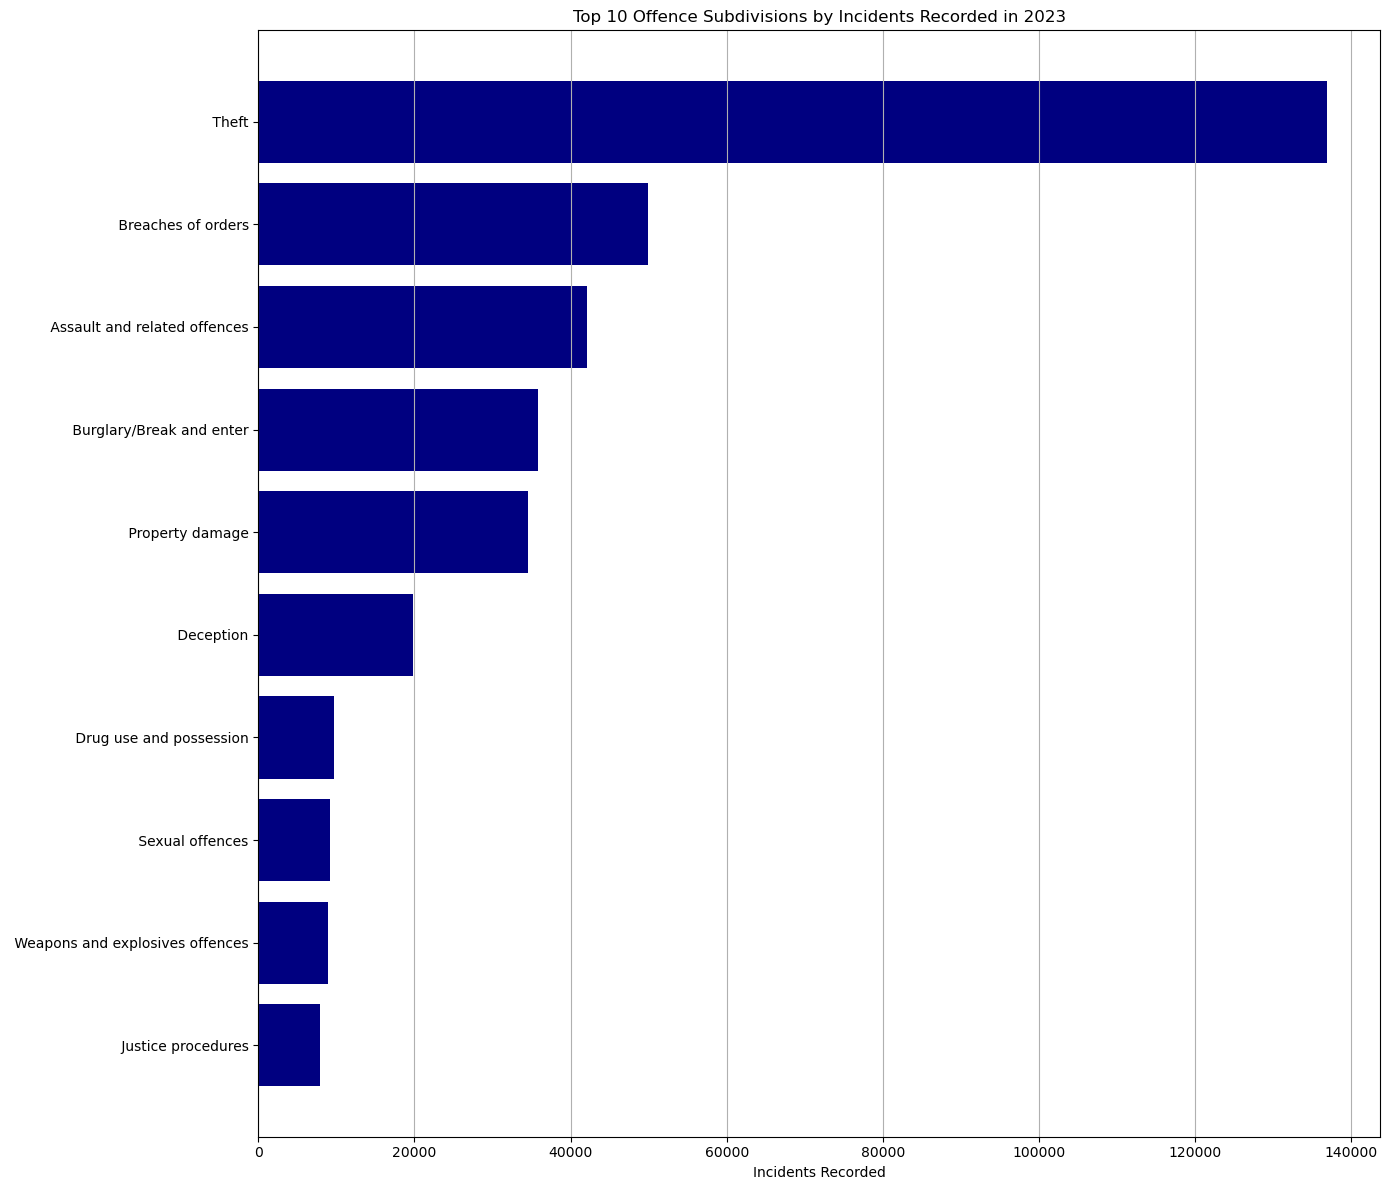

In [13]:
# Plotting the bar chart
plt.figure(figsize=(14, 12))
plt.barh(crimes_by_subdivision_sorted_on['Offence Subdivision'], crimes_by_subdivision_sorted_on['Incidents Recorded'], color='navy')
plt.xlabel('Incidents Recorded')
plt.title('Top 10 Offence Subdivisions by Incidents Recorded in 2023')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='-')
plt.savefig('Visualisation Images/top 10 Offence subdivisions by incidents recorded.png')

In [14]:
# Filter data on Top 10 LGAs by Offence Division for 2023. 

crimes_by_subdivision = clean_crimes.loc[clean_crimes["Year"] == 2023]

# Group by "Local Government Area" and "Offence Division", summing up "LGA Rate per 100,000 population"
crimes_by_subdivision = crimes_by_subdivision.groupby(["Local Government Area", 'Offence Division'])["LGA Rate per 100,000 population"].sum().reset_index()

crimes_by_subdivision['Offence Division'] = crimes_by_subdivision['Offence Division'].apply(lambda x: x[1:])
crimes_by_subdivision.head()

,Local Government Area,Offence Division,"LGA Rate per 100,000 population"
0,Alpine,Crimes against the person,513.83
1,Alpine,Property and deception offences,1307.26
2,Alpine,Drug offences,105.80
3,Alpine,Public order and security offences,143.59
4,Alpine,Justice procedures offences,324.92


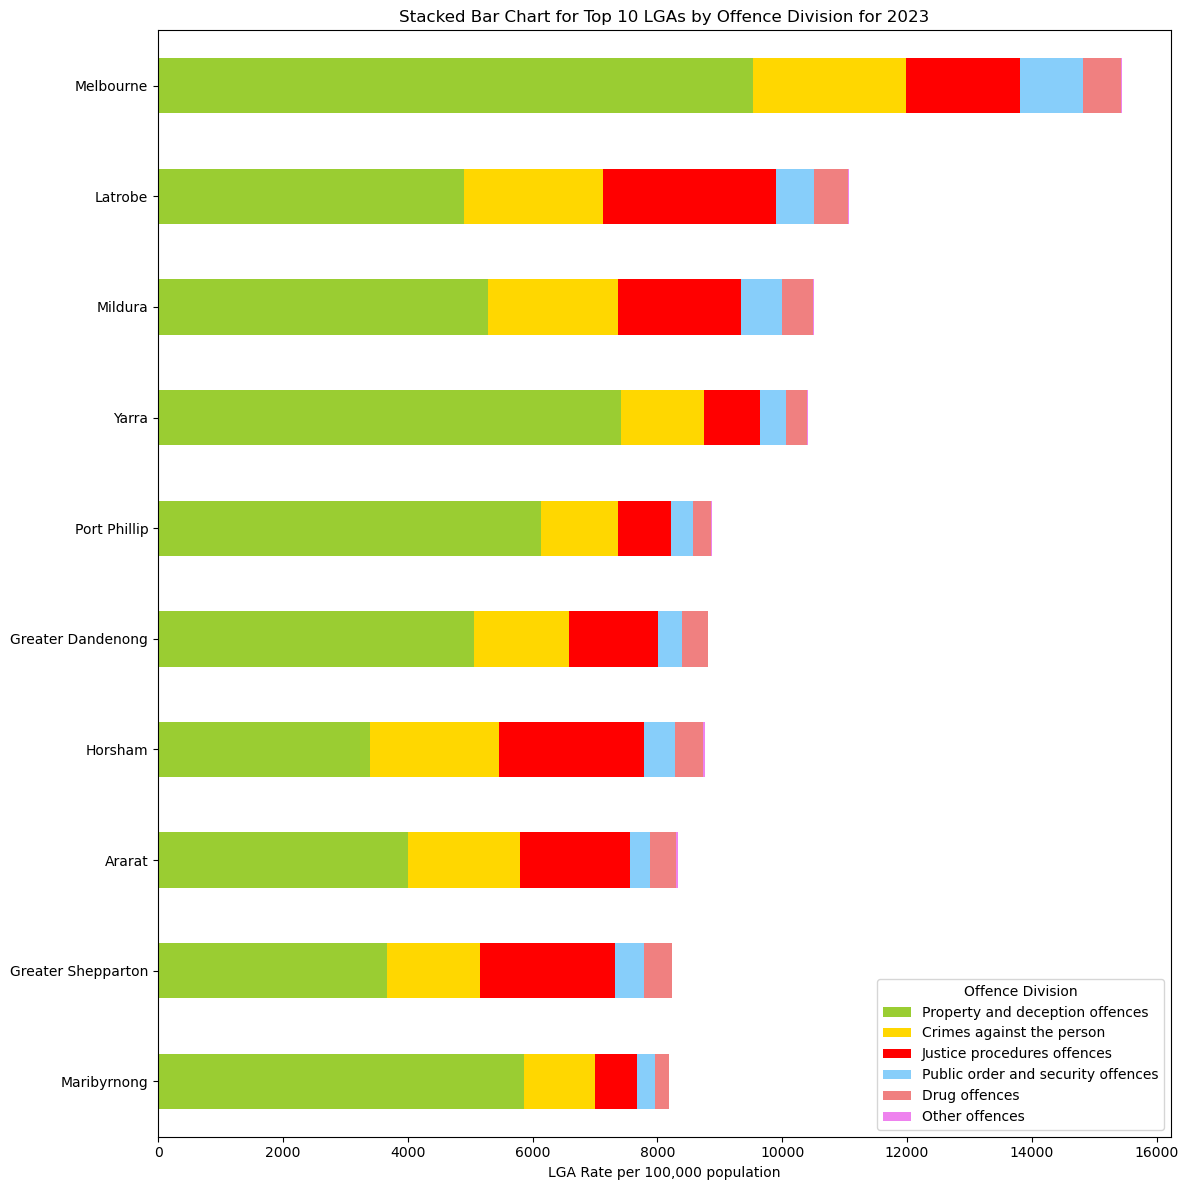

In [15]:
 # List of selected LGAs
selected_lgas = ['Melbourne', 'Latrobe', 'Mildura', 'Yarra', 'Port Phillip', 'Greater Dandenong', 'Horsham', 'Ararat', 'Greater Shepparton', 'Maribyrnong']


# Filter the DataFrame to include only the selected LGAs
selected_crimes = crimes_by_subdivision[crimes_by_subdivision['Local Government Area'].isin(selected_lgas)]

# Sort the selected crimes DataFrame by "Offence Division" and "LGA Rate per 100,000 population" in descending order
selected_crimes_sorted = selected_crimes.sort_values(by=["Offence Division", "LGA Rate per 100,000 population"], ascending=[True, False])

# Reset the index to make 'Local Government Area' a column again
selected_crimes_sorted.reset_index(drop=True, inplace=True)

# Pivot the DataFrame to have 'Offence Division' as columns
pivoted_crimes = selected_crimes_sorted.pivot(index='Local Government Area', columns='Offence Division', values='LGA Rate per 100,000 population')

# Calculate the total sum of each Offence Division and sort the columns (Offence Divisions) by these sums in descending order
sorted_columns = pivoted_crimes.sum().sort_values(ascending=False).index
pivoted_crimes = pivoted_crimes[sorted_columns]

# Calculate the total sum of each LGA and sort the rows (LGAs) by these sums in descending order
sorted_rows = pivoted_crimes.sum(axis=1).sort_values(ascending=False).index
pivoted_crimes = pivoted_crimes.loc[sorted_rows]


# Adjust keys in colors_dict by stripping leading/trailing spaces
colors_dict = {
    'Crimes against the person': 'gold',
    'Property and deception offences': 'yellowgreen',
    'Drug offences': 'lightcoral',
    'Public order and security offences': 'lightskyblue',
    'Justice procedures offences': 'red',
    'Other offences': 'violet'
}


# Strip leading/trailing spaces from pivoted_crimes columns before using them as keys
pivoted_crimes.columns = pivoted_crimes.columns.str.strip()

# Plotting the stacked bar chart
ax = pivoted_crimes.plot(kind='barh', stacked=True, figsize=(12, 12), color=[colors_dict[col] for col in pivoted_crimes.columns])
plt.title('Stacked Bar Chart for Top 10 LGAs by Offence Division for 2023')
plt.xlabel('LGA Rate per 100,000 population')
ax.set_ylabel('')
plt.legend(title='Offence Division')
plt.tight_layout()
plt.gca().invert_yaxis()

plt.savefig('Visualisation Images/stacked bar Chart for top 10 LGAs by offence division for 2023.png')




## Crime Rates for Major Offence Divisions over the period 2014-2023

In [16]:
# Group by Year and Offence Division, and sum the 'Incidents Recorded' column
division_crime_2014_to_2023 = clean_crimes.groupby(['Year', 'Offence Division'])['LGA Rate per 100,000 population'].sum().reset_index()
division_crime_2014_to_2023['Offence Division'] = division_crime_2014_to_2023['Offence Division'].apply(lambda x: x[1:])
division_crime_2014_to_2023.head()

,Year,Offence Division,"LGA Rate per 100,000 population"
0,2014,Crimes against the person,70856.60
1,2014,Property and deception offences,255167.29
2,2014,Drug offences,18960.27
3,2014,Public order and security offences,36510.09
4,2014,Justice procedures offences,38021.92


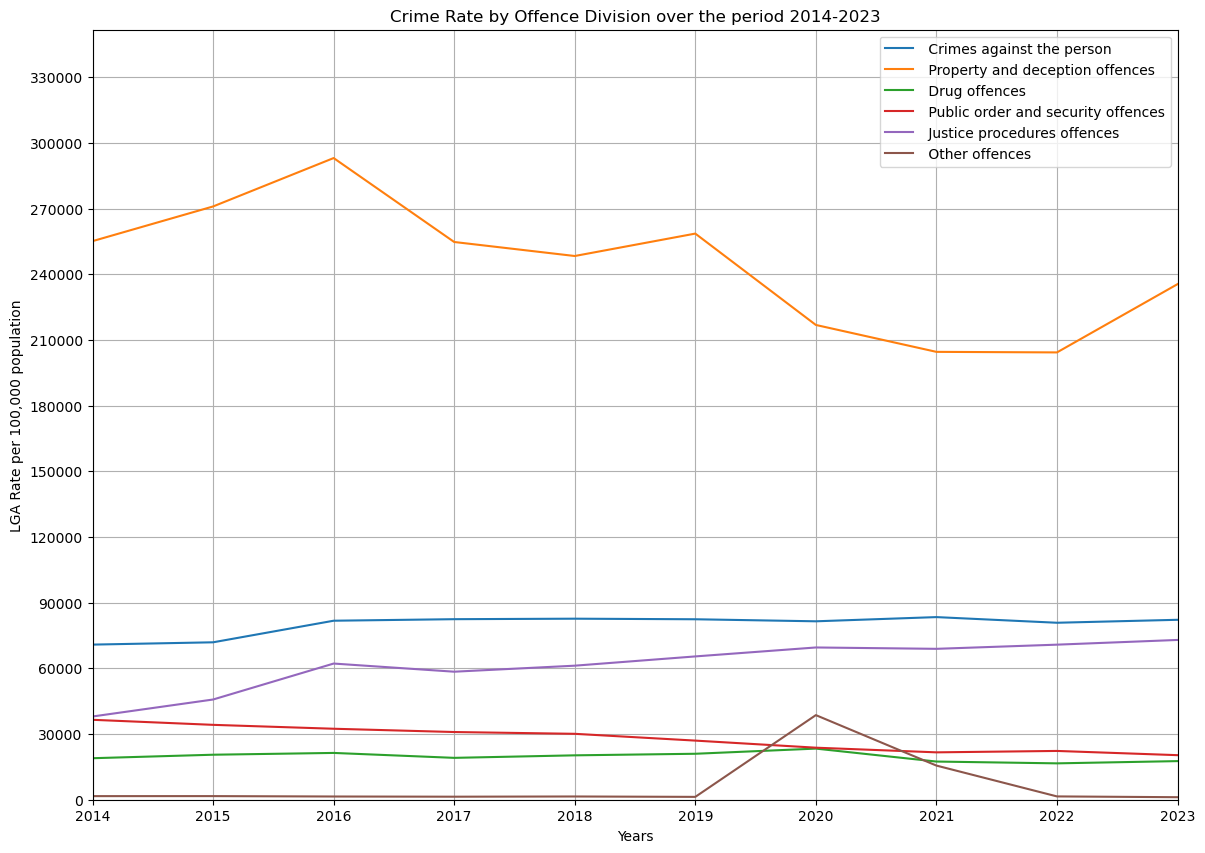

In [17]:
# Plotting the line chart
plt.figure(figsize=(14, 10))  # Set the figure size
for division in division_crime_2014_to_2023['Offence Division'].unique():
    data = division_crime_2014_to_2023[division_crime_2014_to_2023['Offence Division'] == division]
    plt.plot(data['Year'], data['LGA Rate per 100,000 population'], label=division)

plt.xlabel('Years')  # Label for x-axis
plt.ylabel('LGA Rate per 100,000 population')  
plt.title('Crime Rate by Offence Division over the period 2014-2023')  
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xlim(2014, 2023)  
plt.xticks(range(2014, 2024))

# Set the range for the y-axis (adjust these values as needed)
plt.ylim(0, division_crime_2014_to_2023['LGA Rate per 100,000 population'].max() * 1.2)  # 20% higher than the maximum value

# Show y-axis labels spaced 30,000 apart
plt.yticks(np.arange(0, division_crime_2014_to_2023['LGA Rate per 100,000 population'].max() * 1.2, step=30000))

plt.savefig('Visualisation Images/crime rate by Offence Division over the period 2014-2023.png')
